# Importing Necessary Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [27]:
record=pd.read_csv(r"C:\Users\Vampatapu Koushik\bikes.csv")

In [28]:
record

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0
...,...,...,...,...,...,...,...,...,...,...
256,14/09/2013,00:00,2488,1494,1706,2911,979,1075,3277,2456
257,15/09/2013,00:00,2243,1749,1417,2933,1804,1459,3623,2527
258,16/09/2013,00:00,4206,2466,2799,5485,3272,855,4307,3012
259,17/09/2013,00:00,5506,3153,3563,6626,3882,1485,5332,3745


In [29]:
record.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


# Summary Statistics of the dataset

In [30]:
record.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


# Daily Attendance of Berri1 and pierDup Tracks

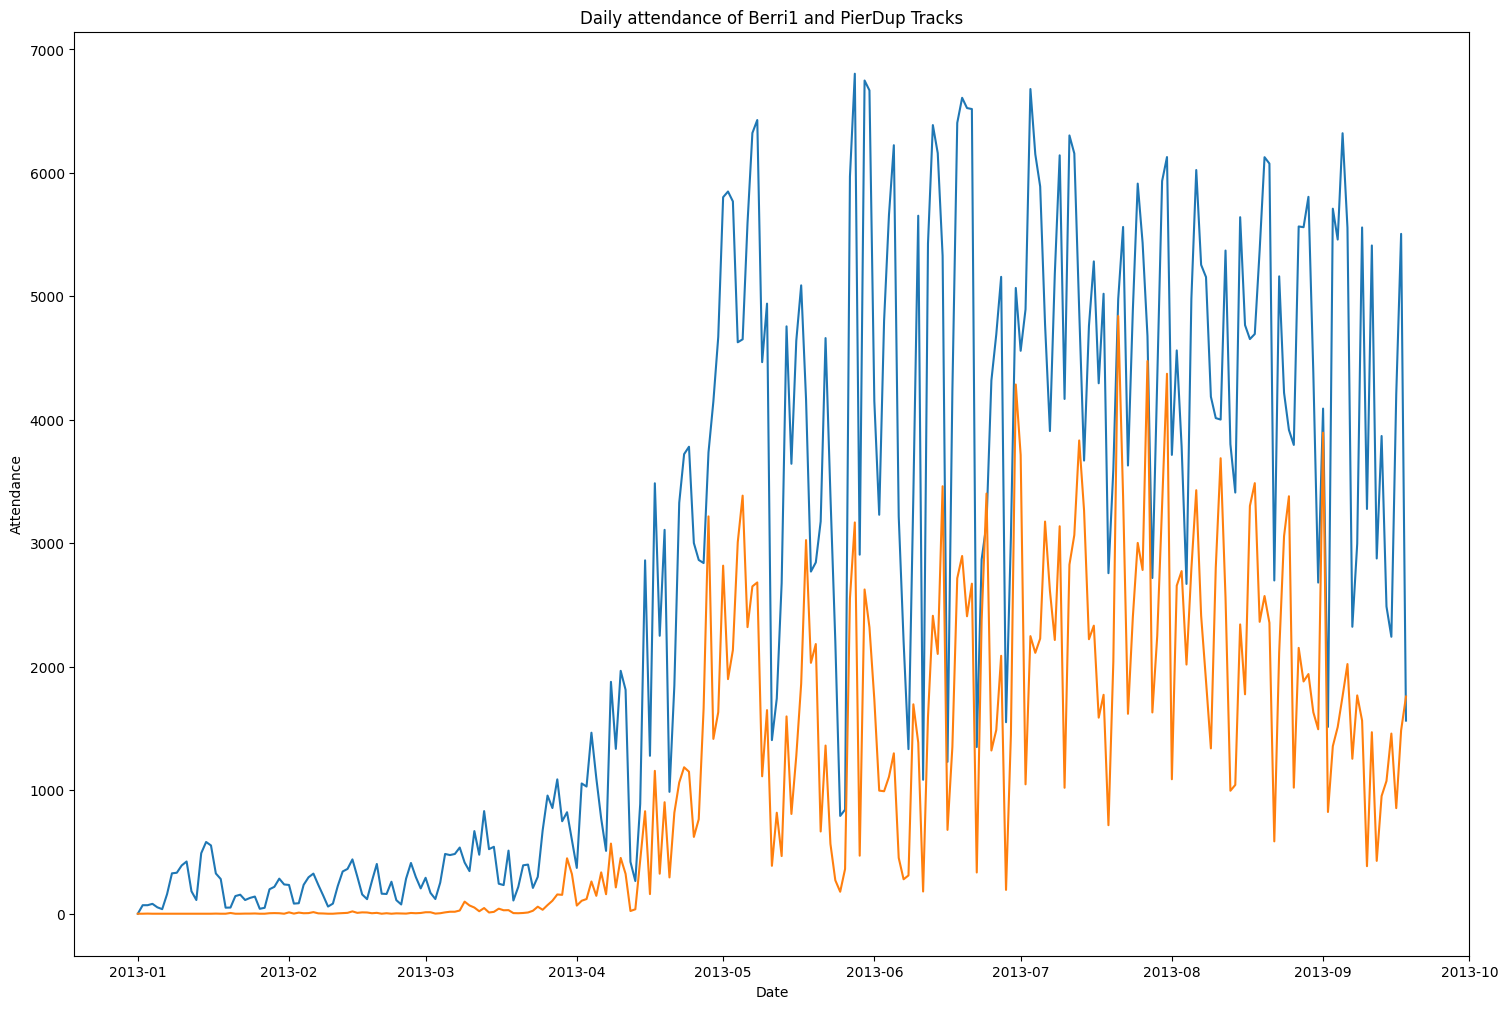

In [31]:
record['Date']=pd.to_datetime(record['Date'], format='%d/%m/%Y')
plt.figure(figsize=(18,12))
plt.plot(record['Date'],record['Berri1'],label='Berri1')
plt.plot(record['Date'],record['PierDup'],label='PierDup')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.title('Daily attendance of Berri1 and PierDup Tracks')
plt.show()


In [33]:
record['Weekday'] = record['Date'].dt.weekday
record['Weekday_name'] = record['Date'].dt.strftime('%A')
print(record.head())

        Date Unnamed: 1  Berri1  CSC  Mais1  Mais2  Parc  PierDup  Rachel1  \
0 2013-01-01      00:00       0    0      1      0     6        0        1   
1 2013-01-02      00:00      69    0     13      0    18        0        2   
2 2013-01-03      00:00      69    2     21      6    22        1        0   
3 2013-01-04      00:00      80    0     22      4    16        0      125   
4 2013-01-05      00:00      52    4     19      3    12        0       97   

   Totem_Laurier  Weekday Weekday_name  
0              0        1      Tuesday  
1              0        2    Wednesday  
2              0        3     Thursday  
3              0        4       Friday  
4              0        5     Saturday  


# Attendance On the Weekdays

In [48]:
weekday_sum=record.groupby('Weekday_name').sum(numeric_only=True)
print(weekday_sum)

              Berri1    CSC  Mais1   Mais2   Parc  PierDup  Rachel1  \
Weekday_name                                                          
Friday        105701  44252  71605  127526  64385    36850   118556   
Monday        106826  51646  68087  129982  69767    44500   119211   
Saturday       75754  27226  45947   79743  35544    46149    97143   
Sunday         74873  29181  40812   75746  37620    53812   100735   
Thursday      115193  52340  76273  141424  73668    36349   120684   
Tuesday       117244  54656  76974  141217  74299    40679   123533   
Wednesday     120434  59604  79033  145860  80437    42564   125173   

              Totem_Laurier  Weekday  
Weekday_name                          
Friday                71426      148  
Monday                72883        0  
Saturday              56438      185  
Sunday                53798      222  
Thursday              74540      111  
Tuesday               76559       38  
Wednesday             79501       76  


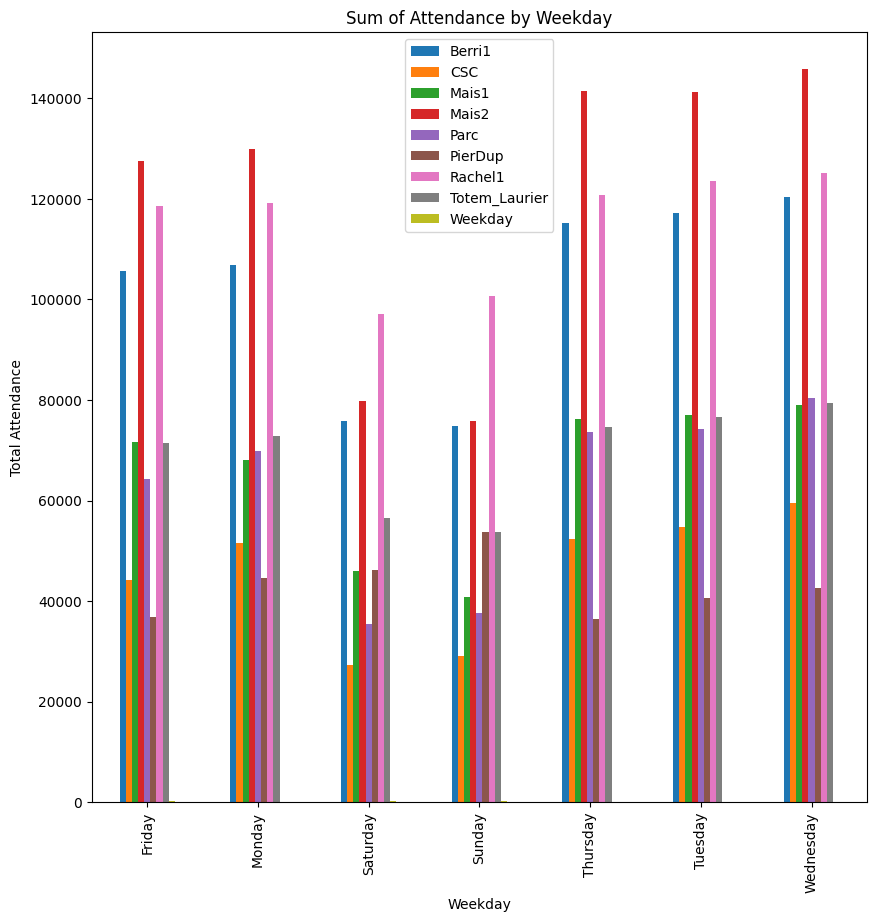

In [47]:
weekday_sum.plot(kind='bar', figsize=(10,10))
plt.title('Sum of Attendance by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Attendance')
plt.show()

# Based on the analysis of the Bikes dataset,here are the key inference drawn from the data:
## 1.After plotting the sum of attendance by weekday, you can infer patterns in the attendance trends. 
## 2. such as whether weekends tend to have more or fewer cyclists, and if some days of the week.
## 3. have significantly higher or lower attendance compared to others.